In [143]:
import json 
import matplotlib.pyplot as plt 
import numpy as np

In [144]:
def readJsonManually():
    f = open('data.json','r', encoding='utf8')
    data = json.load(f) 
    f.close()
    return data

def saveJson(dictt):
    f = open('newData.json','w', encoding='utf8')
    data = json.dump(dictt,f) 
    f.close()

In [145]:
weekPeriod = 7 * 24 * 60 * 60 * 1000
hour = 60 * 60 * 1000

In [146]:
data = readJsonManually()

In [147]:
userInfo = data['UserInfo']

In [148]:
targetHistory = data['TargetHistory']

In [149]:
usageHistory = data['UsageHistory']

In [150]:
st = {}
st = set()

for x in userInfo:
    user = userInfo[x]
    if "weekFourTwoStartTime" in user:
        st.add(x)

for x in userInfo:
    user = userInfo[x]
    if "weekThreeStartTime" in user:
        item = targetHistory[x]
        if item['weekNumber'] == 1:
            st.add(x)

st.discard('2016331006')
for i in st:
    print(i)

2016331102
2016615144
2016331012
2016331066
2016331072
2016331049
2016331037
2016331068
0000000202


# combine split data

In [151]:
data1 = userInfo['2016331089']
data2 = userInfo['20163331089']
weekThreeOfdataTwo = data2['weekOneStartTime']
data1['weekThreeStartTime'] = weekThreeOfdataTwo
userInfo['2016331089'] = data1 #userInfo has been combined

weekFour = weekThreeOfdataTwo+weekPeriod
item1 = usageHistory['2016331089']
item2 = usageHistory['20163331089']

for i in range(weekThreeOfdataTwo,weekFour,hour):
        ind = str(i)
        if ind in item2:
            item1[ind] = item2[ind]
usageHistory['2016331089'] = item1 #usageHistory  has been combined

st.add('2016331089')

# new json generation

In [152]:
tempUserInfo = {}
tempUsage = {}
tempTarget = {}

for i in st:
    tempUserInfo[i] = userInfo[i]
    tempUsage[i] = usageHistory[i]
    tempTarget[i] = targetHistory[i]
    

userInfo = tempUserInfo
targetHistory = tempTarget
usageHistory = tempUsage
data['TargetHistory'] = targetHistory
data['UserInfo'] = userInfo
data['UsageHistory'] = usageHistory

saveJson(data)


# plot average weekly usage in one graph

In [153]:
"weekOneStartTime"
"weekTwoStartTime"
"weekThreeStartTime"

weekOne = 0
weekTwo = 0
weekThree = 0
weekFour = 0

avgUsage = [0,0,0]

userCount = 0

for key in userInfo:
    userCount+=1
    user = userInfo[key]
    weekTwo = user["weekTwoStartTime"]
    weekOne = weekTwo - weekPeriod
    weekThree = weekTwo + weekPeriod
    weekFour = weekThree + weekPeriod

    
    usage = usageHistory[key]
    
    for i in range(weekOne,weekTwo,hour):
        ind = str(i)
        if ind in usage:
            hourlyUsageArray = usage[ind]
            for hourlyUsage in hourlyUsageArray:
                #hourlyUsage = hourlyUsageArray[0]
                avgUsage[0]+=hourlyUsage["foregroundTime"]
            
    for i in range(weekTwo,weekThree,hour):
        ind = str(i)
        if ind in usage:
            hourlyUsageArray = usage[ind]
            for hourlyUsage in hourlyUsageArray:
                #hourlyUsage = hourlyUsageArray[0]
                avgUsage[1]+=hourlyUsage["foregroundTime"]
            
            
    for i in range(weekThree,weekFour,hour):
        ind = str(i)
        if ind in usage:
            hourlyUsageArray = usage[ind]
            for hourlyUsage in hourlyUsageArray:
                #hourlyUsage = hourlyUsageArray[0]
                avgUsage[2]+=hourlyUsage["foregroundTime"]
            
            
avgUsage = [x / userCount for x in avgUsage]
print(avgUsage)

[143354565.7, 130453954.1, 150373012.4]


In [154]:
print(userCount)
print(len(st))

10
10


<BarContainer object of 3 artists>

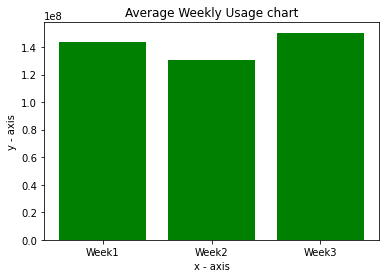

In [155]:
tick_label = ['Week1', 'Week2', 'Week3']
left = [1,2,3]
plt.xlabel('x - axis') 
plt.ylabel('y - axis')
plt.title('Average Weekly Usage chart') 
plt.bar(left, avgUsage
, tick_label = tick_label, 
        width = 0.8, color = ['green']) 

# plot all in one graph

[101068282, 89120843, 65168675]
2016331102
[320611548, 235896255, 291801799]
2016331089
[102348697, 133559099, 137695002]
2016615144
[81066746, 80023123, 90234343]
2016331012
[100772698, 70512955, 132659900]
2016331066
[94002122, 94206398, 86507122]
2016331072
[174360307, 145719844, 178399524]
2016331049
[78835734, 64056900, 114682512]
2016331037
[147983660, 113768330, 131245480]
2016331068
[232495863, 277675794, 275335767]
0000000202


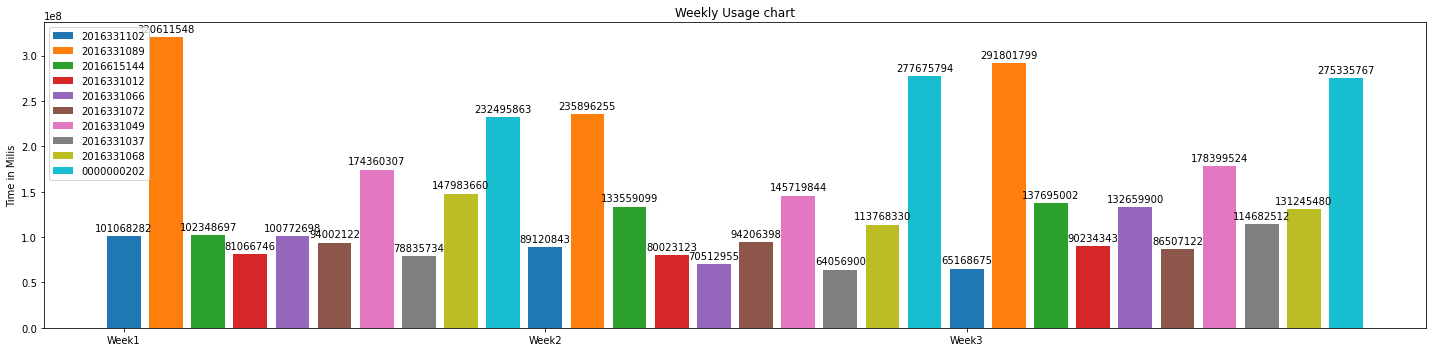

In [156]:
"weekOneStartTime"
"weekTwoStartTime"
"weekThreeStartTime"

weekOne = 0
weekTwo = 0
weekThree = 0
weekFour = 0



userCount = 0

#fig, ax = plt.subplots(ncols=10, figsize=(30, 10))
fig, ax = plt.subplots(figsize=(20,5))


def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

for key in userInfo:
    userCount+=1
    user = userInfo[key]
    weekTwo = user["weekTwoStartTime"]
    weekOne = weekTwo - weekPeriod
    weekThree = weekTwo + weekPeriod
    weekFour = weekThree + weekPeriod

    
    usage = usageHistory[key]
    avgUsage = [0,0,0]
    
    for i in range(weekOne,weekTwo,hour):
        ind = str(i)
        if ind in usage:
            hourlyUsageArray = usage[ind]
            for hourlyUsage in hourlyUsageArray:
                #hourlyUsage = hourlyUsageArray[0]
                avgUsage[0]+=hourlyUsage["foregroundTime"]
            
    for i in range(weekTwo,weekThree,hour):
        ind = str(i)
        if ind in usage:
            hourlyUsageArray = usage[ind]
            for hourlyUsage in hourlyUsageArray:
                #hourlyUsage = hourlyUsageArray[0]
                avgUsage[1]+=hourlyUsage["foregroundTime"]
            
            
    for i in range(weekThree,weekFour,hour):
        ind = str(i)
        if ind in usage:
            hourlyUsageArray = usage[ind]
            for hourlyUsage in hourlyUsageArray:
                #hourlyUsage = hourlyUsageArray[0]
                avgUsage[2]+=hourlyUsage["foregroundTime"]
            
    print(avgUsage)
    print(key)
    
    tick_label = ['Week1', 'Week2', 'Week3']
    x = np.arange(0,21,10) # the label locations for max 10 user currently
    width = 0.8  # the width of the bars
    
    rect = ax.bar(x+userCount-1, avgUsage, width, label=key)
    autolabel(rect)

ax.set_ylabel('Time in Milis')
ax.set_title('Weekly Usage chart')
ax.set_xticks(x)
ax.set_xticklabels(tick_label)
ax.legend()
fig.tight_layout()
    
plt.show()

# plot all in seperate graphs

[101068282, 89120843, 65168675]
2016331102
[320611548, 235896255, 291801799]
2016331089
[102348697, 133559099, 137695002]
2016615144
[81066746, 80023123, 90234343]
2016331012
[100772698, 70512955, 132659900]
2016331066
[94002122, 94206398, 86507122]
2016331072
[174360307, 145719844, 178399524]
2016331049
[78835734, 64056900, 114682512]
2016331037
[147983660, 113768330, 131245480]
2016331068
[232495863, 277675794, 275335767]
0000000202


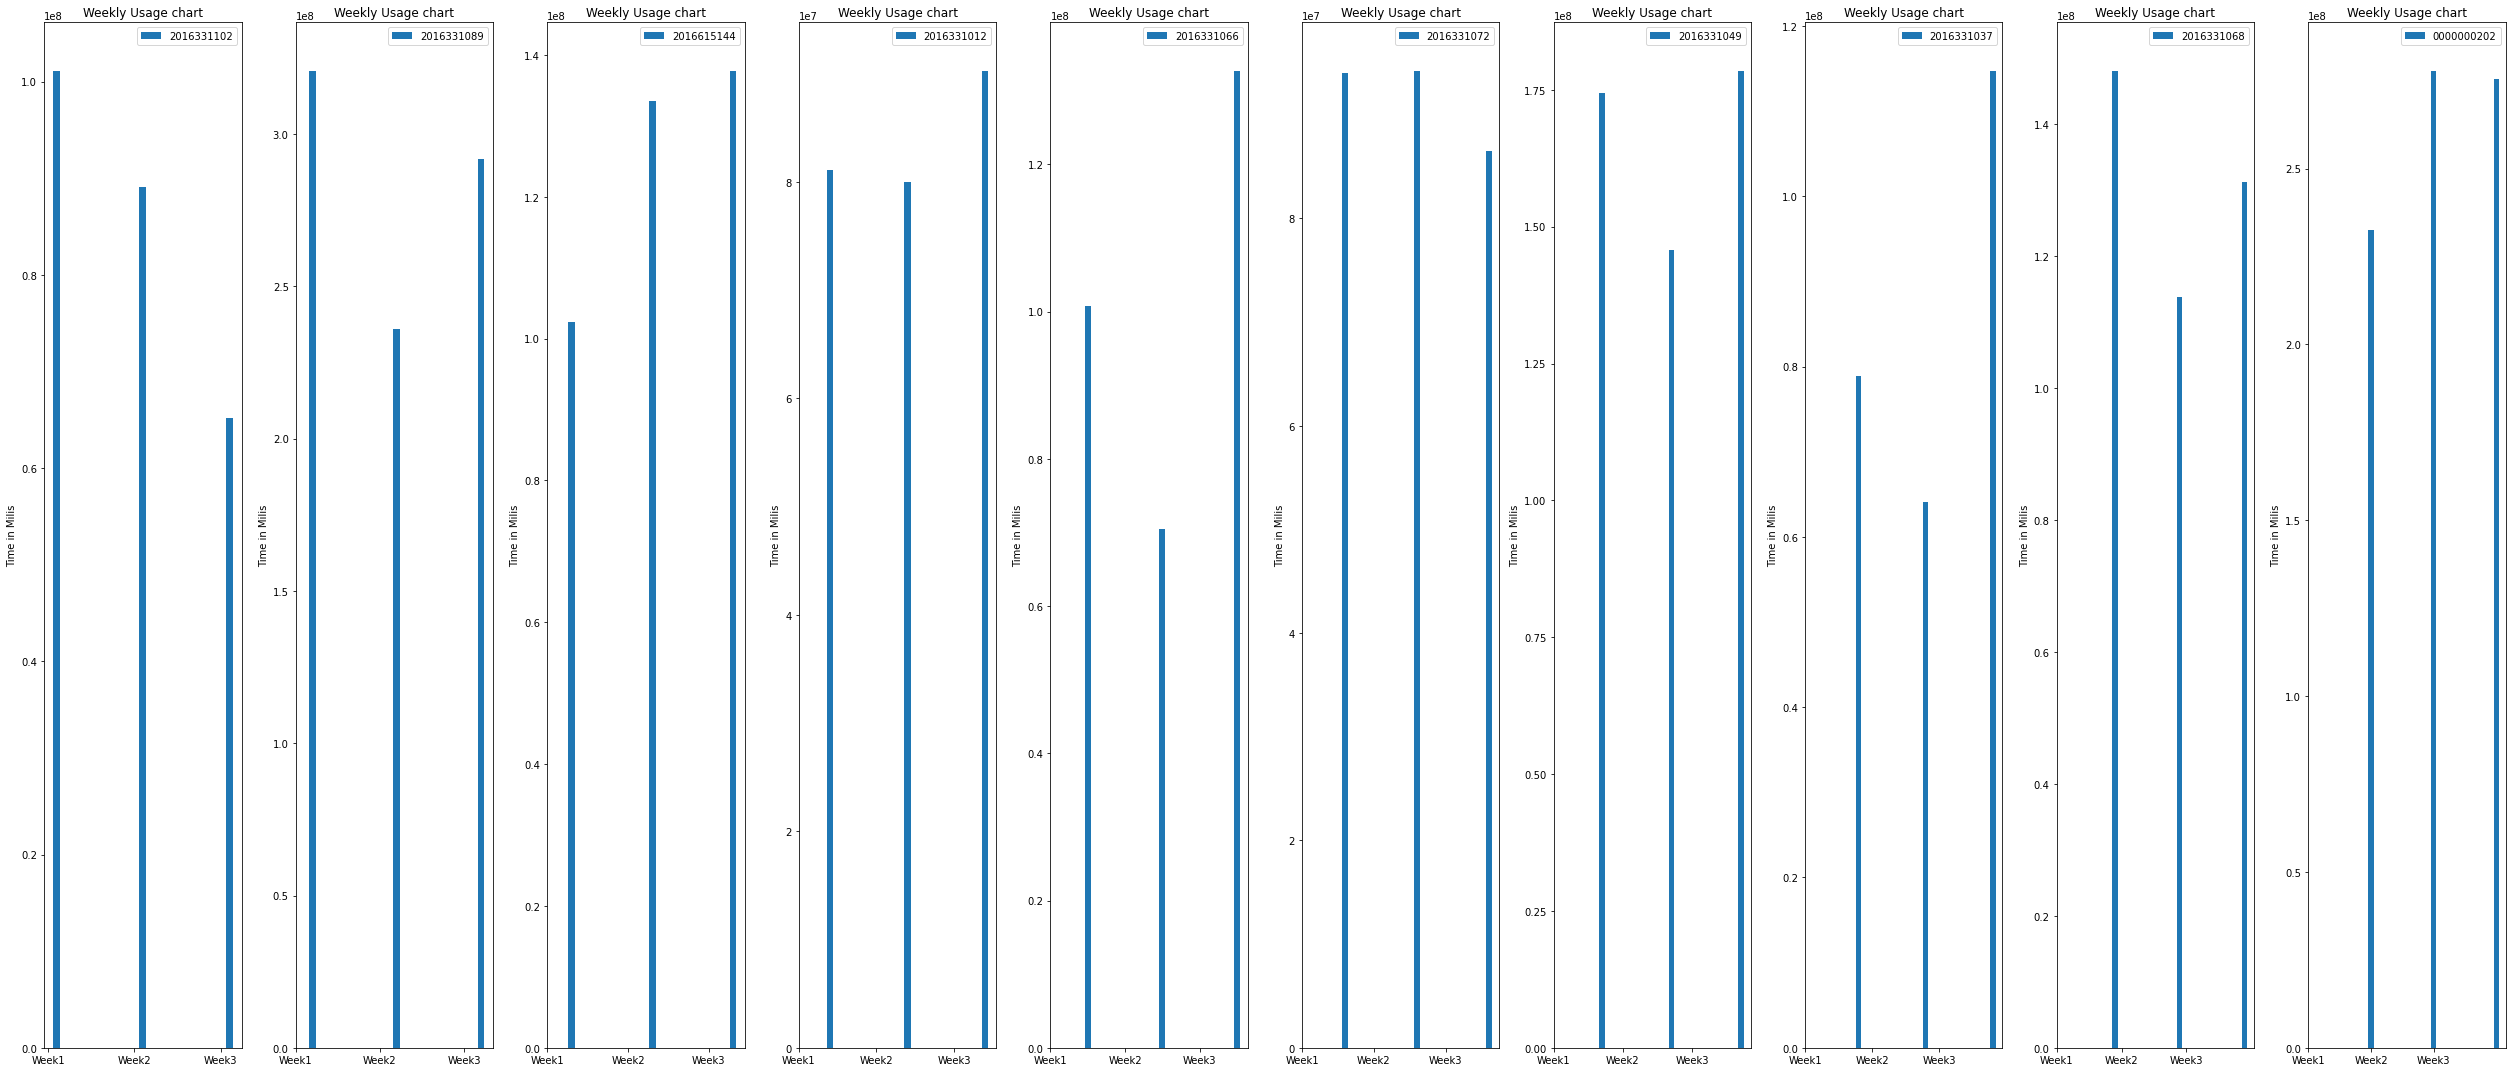

In [161]:
"weekOneStartTime"
"weekTwoStartTime"
"weekThreeStartTime"

weekOne = 0
weekTwo = 0
weekThree = 0
weekFour = 0



userCount = 0

fig, ax = plt.subplots(ncols=len(st), figsize=(35, 15)) # len(st) number of user
#fig, ax = plt.subplots()


def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

for key in userInfo:
    userCount+=1
    user = userInfo[key]
    weekTwo = user["weekTwoStartTime"]
    weekOne = weekTwo - weekPeriod
    weekThree = weekTwo + weekPeriod
    weekFour = weekThree + weekPeriod

    
    usage = usageHistory[key]
    avgUsage = [0,0,0]
    
    for i in range(weekOne,weekTwo,hour):
        ind = str(i)
        if ind in usage:
            hourlyUsageArray = usage[ind]
            for hourlyUsage in hourlyUsageArray:
                #hourlyUsage = hourlyUsageArray[0]
                avgUsage[0]+=hourlyUsage["foregroundTime"]
            
    for i in range(weekTwo,weekThree,hour):
        ind = str(i)
        if ind in usage:
            hourlyUsageArray = usage[ind]
            for hourlyUsage in hourlyUsageArray:
                #hourlyUsage = hourlyUsageArray[0]
                avgUsage[1]+=hourlyUsage["foregroundTime"]
            
            
    for i in range(weekThree,weekFour,hour):
        ind = str(i)
        if ind in usage:
            hourlyUsageArray = usage[ind]
            for hourlyUsage in hourlyUsageArray:
                #hourlyUsage = hourlyUsageArray[0]
                avgUsage[2]+=hourlyUsage["foregroundTime"]
            
    print(avgUsage)
    print(key)
    
    tick_label = ['Week1', 'Week2', 'Week3']
    x = np.arange(0,21,10) # the label locations
    width = 0.8  # the width of the bars
    
    rect = ax[userCount-1].bar(x+userCount, avgUsage, width, label=key)
    #autolabel(rect)
    ax[userCount-1].set_ylabel('Time in Milis')
    ax[userCount-1].set_title('Weekly Usage chart')
    ax[userCount-1].set_xticks(x)
    ax[userCount-1].set_xticklabels(tick_label)
    ax[userCount-1].legend()
    fig.tight_layout()
    
plt.show()